In [1]:
'''Case Study
 
Business Objective: Help Lending Club identify members most likely to default on their loan
 
Key skills being assessed: Story telling
 
Overview
The following exercise will provide you with the opportunity to demonstrate your understanding and expertise of data science, machine learning models, and communication skills.
 
Please find the details and expectations below. 
 
Given the attached Lending Club data:
1.          Build an useful model, one which will help the business (it’s okay to take an estimated guess)
2.         Create a Deck to be presented to a semi-technical business audience.
3.         Business is looking for actionable insights.
•           How to use the model to make to maximize their profit. 
•           Please make assumptions when you do not have the necessary information.
4.         Please also share the Jupyter notebook in Python used to create the model.
'''

'Case Study\n \nBusiness Objective: Help Lending Club identify members most likely to default on their loan\n \nKey skills being assessed: Story telling\n \nOverview\nThe following exercise will provide you with the opportunity to demonstrate your understanding and expertise of data science, machine learning models, and communication skills.\n \nPlease find the details and expectations below. \n \nGiven the attached Lending Club data:\n1.          Build an useful model, one which will help the business (it’s okay to take an estimated guess)\n2.         Create a Deck to be presented to a semi-technical business audience.\n3.         Business is looking for actionable insights.\n•           How to use the model to make to maximize their profit. \n•           Please make assumptions when you do not have the necessary information.\n4.         Please also share the Jupyter notebook in Python used to create the model.\n'

In [2]:
!pip install lightgbm

In [49]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import shap 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# view all cols 
pd.set_option('display.max_columns', None)


In [4]:
df1 = pd.read_csv('~/Cas/LendingClubData-DR_Demo_Lending_Club.csv')

In [5]:
df1.describe

<bound method NDFrame.describe of          Id  is_bad             emp_title emp_length home_ownership  \
0         1       0     Time Warner Cable         10       MORTGAGE   
1         2       0     Ottawa University          1           RENT   
2         3       0        Kennedy Wilson          4           RENT   
3         4       0    TOWN OF PLATTEKILL         10       MORTGAGE   
4         5       0  Belmont Correctional         10       MORTGAGE   
...     ...     ...                   ...        ...            ...   
9995   9996       0                 Cabot          5       MORTGAGE   
9996   9997       0        Gallant & Wein          1           RENT   
9997   9998       0    Weichert, Realtors          8           RENT   
9998   9999       0          meadwestvaco          6       MORTGAGE   
9999  10000       0        Rehab Alliance          1           RENT   

      annual_inc       verification_status pymnt_plan  \
0        50000.0              not verified          n   

In [57]:
df1.shape 

(10000, 32)

In [58]:
df1.columns 

Index(['Id', 'is_bad', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'Notes',
       'purpose_cat', 'purpose', 'zip_code', 'addr_state', 'debt_to_income',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'earliest_cr_num_months',
       'boolean_list_status', 'bool_pymnt_plan', 'bool_list_status'],
      dtype='object')

In [59]:
for i in range(df1.shape[1]): 
    print(i, pd.isna(df1.iloc[:, i]).sum(), df1.columns[i])

0 0 Id
1 0 is_bad
2 592 emp_title
3 0 emp_length
4 0 home_ownership
5 1 annual_inc
6 0 verification_status
7 0 pymnt_plan
8 3231 Notes
9 0 purpose_cat
10 4 purpose
11 0 zip_code
12 0 addr_state
13 0 debt_to_income
14 5 delinq_2yrs
15 5 earliest_cr_line
16 5 inq_last_6mths
17 6316 mths_since_last_delinq
18 9160 mths_since_last_record
19 5 open_acc
20 5 pub_rec
21 0 revol_bal
22 26 revol_util
23 5 total_acc
24 0 initial_list_status
25 32 collections_12_mths_ex_med
26 0 mths_since_last_major_derog
27 0 policy_code
28 5 earliest_cr_num_months
29 0 boolean_list_status
30 0 bool_pymnt_plan
31 0 bool_list_status


In [7]:
for i in range(df1.shape[1]): 
    print(i,df1.columns[i],  len(pd.unique(df1.iloc[:, i])))

0 Id 10000
1 is_bad 2
2 emp_title 8184
3 emp_length 14
4 home_ownership 5
5 annual_inc 1902
6 verification_status 3
7 pymnt_plan 2
8 Notes 6761
9 purpose_cat 27
10 purpose 5678
11 zip_code 720
12 addr_state 50
13 debt_to_income 2585
14 delinq_2yrs 11
15 earliest_cr_line 464
16 inq_last_6mths 21
17 mths_since_last_delinq 92
18 mths_since_last_record 95
19 open_acc 37
20 pub_rec 5
21 revol_bal 8130
22 revol_util 1028
23 total_acc 76
24 initial_list_status 2
25 collections_12_mths_ex_med 2
26 mths_since_last_major_derog 3
27 policy_code 5


In [8]:
df1.columns

Index(['Id', 'is_bad', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'Notes',
       'purpose_cat', 'purpose', 'zip_code', 'addr_state', 'debt_to_income',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code'],
      dtype='object')

In [9]:
# Imbalanced data 
df1[df1.loc[: , 'is_bad'] == 0 ].shape , df1[df1.loc[: , 'is_bad'] == 1 ].shape 

((8705, 28), (1295, 28))

In [10]:
# Let's take a look at the firts 5 rows in the data. 

df1.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,Medical,766xx,TX,10.87,0.0,12/1/92,0.0,NaN,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,My Debt Consolidation Loan,660xx,KS,9.15,0.0,11/1/05,2.0,NaN,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,AP Personal Loan,916xx,CA,11.24,0.0,6/1/70,0.0,NaN,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,Debt Consolidation Loan,124xx,NY,6.18,1.0,9/1/82,0.0,16.0,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,consolidate,439xx,OH,19.03,0.0,10/1/99,4.0,NaN,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [11]:
df1.shape[0]

10000

In [12]:
df1.loc[1, 'earliest_cr_line']

'11/1/05'

In [13]:
# This feature is created to see how long it has been since first credit opened for each record based on earliest_cr_line and today's month. 
# Holds how many months have been since first credit. 
today = datetime.now()
df1['earliest_cr_num_months'] = 0 
for i in range(df1.shape[0]): 
    start_date = pd.to_datetime(df1.loc[i, 'earliest_cr_line'], format='%m/%d/%y')
    df1.loc[i, 'earliest_cr_num_months'] = (today.year - start_date.year) * 12 + (today.month - start_date.month)

In [60]:
df1[['earliest_cr_line', 'earliest_cr_num_months']]

,earliest_cr_line,earliest_cr_num_months
0,12/1/92,395.0
1,11/1/05,240.0
2,6/1/70,665.0
3,9/1/82,518.0
4,10/1/99,313.0
...,...,...
9995,9/1/01,290.0
9996,5/1/00,306.0
9997,12/1/89,431.0
9998,3/1/99,320.0


In [14]:
# Checking each col 
pd.unique(df1['home_ownership'])

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [15]:
pd.unique(df1['verification_status'])

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [16]:
pd.unique(df1['pymnt_plan'])

array(['n', 'y'], dtype=object)

In [17]:
df1[df1['initial_list_status']=='m'].shape , df1[df1['initial_list_status']=='f'].shape 

((17, 29), (9983, 29))

In [18]:
df1['boolean_list_status'] = 0 
df1['bool_pymnt_plan'] = 0 
mapping_dict = {'m': True, 'f': False}
# Apply the mapping to the column
df1['bool_list_status'] = df1['initial_list_status'].map(mapping_dict)
mapping_dict = {'y': True, 'n': False}
df1['bool_pymnt_plan'] = df1['pymnt_plan'].map(mapping_dict)

In [19]:
df2 = pd.get_dummies(df1, columns= ['purpose_cat', 'verification_status', 'home_ownership', 'policy_code'])

In [20]:
df2.columns 

Index(['Id', 'is_bad', 'emp_title', 'emp_length', 'annual_inc', 'pymnt_plan',
       'Notes', 'purpose', 'zip_code', 'addr_state', 'debt_to_income',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'earliest_cr_num_months',
       'boolean_list_status', 'bool_pymnt_plan', 'bool_list_status',
       'purpose_cat_car', 'purpose_cat_car small business',
       'purpose_cat_credit card', 'purpose_cat_credit card small business',
       'purpose_cat_debt consolidation',
       'purpose_cat_debt consolidation small business',
       'purpose_cat_educational', 'purpose_cat_educational small business',
       'purpose_cat_home improvement',
       'purpose_cat_home improvement small business', 'purpose_cat_house',
       'purpose_cat_house small business', 'pu

In [21]:
for i in range(df2.shape[1]): 
    print(i, pd.isna(df2.iloc[:, i]).sum(), df2.columns[i] )

0 0 Id
1 0 is_bad
2 592 emp_title
3 0 emp_length
4 1 annual_inc
5 0 pymnt_plan
6 3231 Notes
7 4 purpose
8 0 zip_code
9 0 addr_state
10 0 debt_to_income
11 5 delinq_2yrs
12 5 earliest_cr_line
13 5 inq_last_6mths
14 6316 mths_since_last_delinq
15 9160 mths_since_last_record
16 5 open_acc
17 5 pub_rec
18 0 revol_bal
19 26 revol_util
20 5 total_acc
21 0 initial_list_status
22 32 collections_12_mths_ex_med
23 0 mths_since_last_major_derog
24 5 earliest_cr_num_months
25 0 boolean_list_status
26 0 bool_pymnt_plan
27 0 bool_list_status
28 0 purpose_cat_car
29 0 purpose_cat_car small business
30 0 purpose_cat_credit card
31 0 purpose_cat_credit card small business
32 0 purpose_cat_debt consolidation
33 0 purpose_cat_debt consolidation small business
34 0 purpose_cat_educational
35 0 purpose_cat_educational small business
36 0 purpose_cat_home improvement
37 0 purpose_cat_home improvement small business
38 0 purpose_cat_house
39 0 purpose_cat_house small business
40 0 purpose_cat_major purchase


In [22]:
df2[pd.isna(df2[ 'delinq_2yrs'])][['delinq_2yrs', 'total_acc', 'open_acc','pub_rec','inq_last_6mths','revol_util']]

,delinq_2yrs,total_acc,open_acc,pub_rec,inq_last_6mths,revol_util,annual_inc
4319,NaN,NaN,NaN,NaN,NaN,NaN,180000.0
4328,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
4678,NaN,NaN,NaN,NaN,NaN,NaN,6000.0
6232,NaN,NaN,NaN,NaN,NaN,NaN,6500.0
7592,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
missing_data_record_indexes = df2[pd.isna(df2[ 'delinq_2yrs'])].index.to_list()
remaining_indices = df2.index.difference(missing_data_record_indexes)
df3 = df2.loc[remaining_indices]
df3 = df3[['is_bad', 'bool_pymnt_plan', 'emp_length','annual_inc', 'boolean_list_status','delinq_2yrs', 'debt_to_income',
             'mths_since_last_major_derog','earliest_cr_num_months' , 'open_acc',
             'pub_rec','revol_bal', 'revol_util','inq_last_6mths', 'total_acc','purpose_cat_car','purpose_cat_car small business', 'purpose_cat_credit card',
       'purpose_cat_credit card small business', 'purpose_cat_debt consolidation', 'purpose_cat_debt consolidation small business',
       'purpose_cat_educational', 'purpose_cat_educational small business','purpose_cat_home improvement',
       'purpose_cat_home improvement small business', 'purpose_cat_house','purpose_cat_house small business', 'purpose_cat_major purchase',
       'purpose_cat_major purchase small business', 'purpose_cat_medical','purpose_cat_medical small business', 'purpose_cat_moving',
       'purpose_cat_moving small business', 'purpose_cat_other','purpose_cat_other small business', 'purpose_cat_renewable energy','purpose_cat_small business',
       'purpose_cat_small business small business', 'purpose_cat_vacation','purpose_cat_vacation small business', 'purpose_cat_wedding',
       'purpose_cat_wedding small business', 'verification_status_VERIFIED - income','verification_status_VERIFIED - income source',
       'verification_status_not verified', 'home_ownership_MORTGAGE','home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
             'home_ownership_RENT', 'policy_code_PC1', 'policy_code_PC2',
       'policy_code_PC3', 'policy_code_PC4', 'policy_code_PC5']]

In [24]:
for i in range(df3.shape[1]): 
    print(i, pd.isna(df3.iloc[:, i]).sum(), df3.columns[i] )

0 0 is_bad
1 0 bool_pymnt_plan
2 0 emp_length
3 0 annual_inc
4 0 boolean_list_status
5 0 delinq_2yrs
6 0 debt_to_income
7 0 mths_since_last_major_derog
8 0 earliest_cr_num_months
9 0 open_acc
10 0 pub_rec
11 0 revol_bal
12 21 revol_util
13 0 inq_last_6mths
14 0 total_acc
15 0 purpose_cat_car
16 0 purpose_cat_car small business
17 0 purpose_cat_credit card
18 0 purpose_cat_credit card small business
19 0 purpose_cat_debt consolidation
20 0 purpose_cat_debt consolidation small business
21 0 purpose_cat_educational
22 0 purpose_cat_educational small business
23 0 purpose_cat_home improvement
24 0 purpose_cat_home improvement small business
25 0 purpose_cat_house
26 0 purpose_cat_house small business
27 0 purpose_cat_major purchase
28 0 purpose_cat_major purchase small business
29 0 purpose_cat_medical
30 0 purpose_cat_medical small business
31 0 purpose_cat_moving
32 0 purpose_cat_moving small business
33 0 purpose_cat_other
34 0 purpose_cat_other small business
35 0 purpose_cat_renewable

In [25]:
df3.head()

,is_bad,bool_pymnt_plan,emp_length,annual_inc,boolean_list_status,delinq_2yrs,debt_to_income,mths_since_last_major_derog,earliest_cr_num_months,open_acc,pub_rec,revol_bal,revol_util,inq_last_6mths,total_acc,purpose_cat_car,purpose_cat_car small business,purpose_cat_credit card,purpose_cat_credit card small business,purpose_cat_debt consolidation,purpose_cat_debt consolidation small business,purpose_cat_educational,purpose_cat_educational small business,purpose_cat_home improvement,purpose_cat_home improvement small business,purpose_cat_house,purpose_cat_house small business,purpose_cat_major purchase,purpose_cat_major purchase small business,purpose_cat_medical,purpose_cat_medical small business,purpose_cat_moving,purpose_cat_moving small business,purpose_cat_other,purpose_cat_other small business,purpose_cat_renewable energy,purpose_cat_small business,purpose_cat_small business small business,purpose_cat_vacation,purpose_cat_vacation small business,purpose_cat_wedding,purpose_cat_wedding small business,verification_status_VERIFIED - income,verification_status_VERIFIED - income source,verification_status_not verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,policy_code_PC1,policy_code_PC2,policy_code_PC3,policy_code_PC4,policy_code_PC5
0,0,False,10,50000.0,0,0.0,10.87,1,395.0,15.0,0.0,12087,12.1,0.0,44.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1,0,False,1,39216.0,0,0.0,9.15,2,240.0,4.0,0.0,10114,64.0,2.0,5.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False
2,0,False,4,65000.0,0,0.0,11.24,3,665.0,4.0,0.0,81,0.6,0.0,8.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
3,0,False,10,57500.0,0,1.0,6.18,2,518.0,6.0,0.0,10030,37.1,0.0,23.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
4,0,False,10,50004.0,0,0.0,19.03,3,313.0,8.0,0.0,10740,40.4,4.0,21.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False


In [26]:
df3.shape 

(9995, 55)

In [27]:
df3 = df3.fillna(0)

In [28]:
for i in range(df3.shape[1]): 
    print(i, pd.isna(df3.iloc[:, i]).sum(), df3.columns[i] )

0 0 is_bad
1 0 bool_pymnt_plan
2 0 emp_length
3 0 annual_inc
4 0 boolean_list_status
5 0 delinq_2yrs
6 0 debt_to_income
7 0 mths_since_last_major_derog
8 0 earliest_cr_num_months
9 0 open_acc
10 0 pub_rec
11 0 revol_bal
12 0 revol_util
13 0 inq_last_6mths
14 0 total_acc
15 0 purpose_cat_car
16 0 purpose_cat_car small business
17 0 purpose_cat_credit card
18 0 purpose_cat_credit card small business
19 0 purpose_cat_debt consolidation
20 0 purpose_cat_debt consolidation small business
21 0 purpose_cat_educational
22 0 purpose_cat_educational small business
23 0 purpose_cat_home improvement
24 0 purpose_cat_home improvement small business
25 0 purpose_cat_house
26 0 purpose_cat_house small business
27 0 purpose_cat_major purchase
28 0 purpose_cat_major purchase small business
29 0 purpose_cat_medical
30 0 purpose_cat_medical small business
31 0 purpose_cat_moving
32 0 purpose_cat_moving small business
33 0 purpose_cat_other
34 0 purpose_cat_other small business
35 0 purpose_cat_renewable 

In [29]:
for i in range(df3.shape[1]): 
    print(i, pd.isna(df3.iloc[:, i]).sum(), df3.columns[i] )

0 0 is_bad
1 0 bool_pymnt_plan
2 0 emp_length
3 0 annual_inc
4 0 boolean_list_status
5 0 delinq_2yrs
6 0 debt_to_income
7 0 mths_since_last_major_derog
8 0 earliest_cr_num_months
9 0 open_acc
10 0 pub_rec
11 0 revol_bal
12 0 revol_util
13 0 inq_last_6mths
14 0 total_acc
15 0 purpose_cat_car
16 0 purpose_cat_car small business
17 0 purpose_cat_credit card
18 0 purpose_cat_credit card small business
19 0 purpose_cat_debt consolidation
20 0 purpose_cat_debt consolidation small business
21 0 purpose_cat_educational
22 0 purpose_cat_educational small business
23 0 purpose_cat_home improvement
24 0 purpose_cat_home improvement small business
25 0 purpose_cat_house
26 0 purpose_cat_house small business
27 0 purpose_cat_major purchase
28 0 purpose_cat_major purchase small business
29 0 purpose_cat_medical
30 0 purpose_cat_medical small business
31 0 purpose_cat_moving
32 0 purpose_cat_moving small business
33 0 purpose_cat_other
34 0 purpose_cat_other small business
35 0 purpose_cat_renewable 

In [30]:
X = df3[[ 'bool_pymnt_plan', 'emp_length','annual_inc', 'total_acc', 'boolean_list_status','delinq_2yrs', 'debt_to_income',
             'mths_since_last_major_derog','earliest_cr_num_months' , 'open_acc',
             'pub_rec','revol_bal', 'revol_util','inq_last_6mths','purpose_cat_car','purpose_cat_car small business', 'purpose_cat_credit card',
       'purpose_cat_credit card small business', 'purpose_cat_debt consolidation', 'purpose_cat_debt consolidation small business',
       'purpose_cat_educational', 'purpose_cat_educational small business','purpose_cat_home improvement',
       'purpose_cat_home improvement small business', 'purpose_cat_house','purpose_cat_house small business', 'purpose_cat_major purchase',
       'purpose_cat_major purchase small business', 'purpose_cat_medical','purpose_cat_medical small business', 'purpose_cat_moving',
       'purpose_cat_moving small business', 'purpose_cat_other','purpose_cat_other small business', 'purpose_cat_renewable energy','purpose_cat_small business',
       'purpose_cat_small business small business', 'purpose_cat_vacation','purpose_cat_vacation small business', 'purpose_cat_wedding',
       'purpose_cat_wedding small business', 'verification_status_VERIFIED - income','verification_status_VERIFIED - income source',
       'verification_status_not verified', 'home_ownership_MORTGAGE','home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
             'home_ownership_RENT', 'policy_code_PC1', 'policy_code_PC2',
       'policy_code_PC3', 'policy_code_PC4', 'policy_code_PC5']]
y = df3['is_bad']

In [64]:
X.shape 

(9995, 54)

Text(0, 0.5, 't-SNE Component 2')

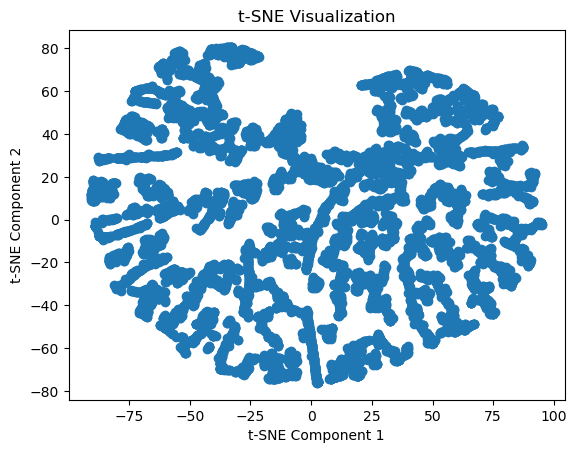

In [62]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

Text(0, 0.5, 't-SNE Component 2')

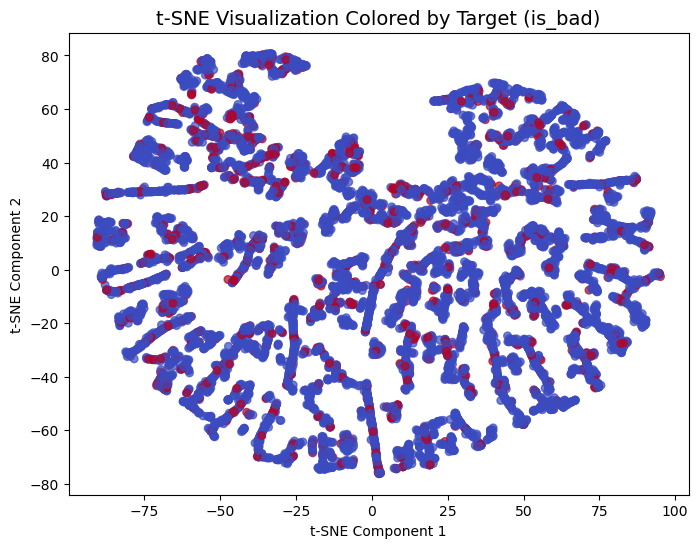

In [63]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X)

# Create the scatter plot with target-based colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_embedded[:, 0],
    X_embedded[:, 1],
    c=y,                    # color by target
    cmap='coolwarm',        # red-blue color map
    alpha=0.7,              # transparency for better visibility
    s=30                    # marker size
)

# Add labels and title
plt.title("t-SNE Visualization Colored by Target (is_bad)", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")


In [32]:
y[y == 0 ].shape , y[y==1].shape 

((8700,), (1295,))

In [33]:
X = X.apply(lambda x: x.astype(float) if x.dtype == bool else x)

In [34]:
X[X['emp_length']=='na']

,bool_pymnt_plan,emp_length,annual_inc,total_acc,boolean_list_status,delinq_2yrs,debt_to_income,mths_since_last_major_derog,earliest_cr_num_months,open_acc,pub_rec,revol_bal,revol_util,inq_last_6mths,purpose_cat_car,purpose_cat_car small business,purpose_cat_credit card,purpose_cat_credit card small business,purpose_cat_debt consolidation,purpose_cat_debt consolidation small business,purpose_cat_educational,purpose_cat_educational small business,purpose_cat_home improvement,purpose_cat_home improvement small business,purpose_cat_house,purpose_cat_house small business,purpose_cat_major purchase,purpose_cat_major purchase small business,purpose_cat_medical,purpose_cat_medical small business,purpose_cat_moving,purpose_cat_moving small business,purpose_cat_other,purpose_cat_other small business,purpose_cat_renewable energy,purpose_cat_small business,purpose_cat_small business small business,purpose_cat_vacation,purpose_cat_vacation small business,purpose_cat_wedding,purpose_cat_wedding small business,verification_status_VERIFIED - income,verification_status_VERIFIED - income source,verification_status_not verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,policy_code_PC1,policy_code_PC2,policy_code_PC3,policy_code_PC4,policy_code_PC5
119,0.0,na,55200.0,53.0,0,0.0,16.76,1,661.0,26.0,0.0,26676,33.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
255,0.0,na,63000.0,16.0,0,0.0,7.81,1,404.0,6.0,0.0,271,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
404,0.0,na,12360.0,11.0,0,0.0,1.66,2,346.0,6.0,0.0,4898,50.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
414,0.0,na,30000.0,19.0,0,0.0,15.60,1,303.0,7.0,0.0,15792,33.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
472,0.0,na,30000.0,6.0,0,0.0,3.04,2,232.0,2.0,0.0,2881,92.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,0.0,na,38376.0,16.0,0,0.0,18.07,3,557.0,5.0,0.0,6575,90.1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9724,0.0,na,25980.0,21.0,0,1.0,11.45,3,328.0,5.0,0.0,794,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9732,0.0,na,35500.0,52.0,0,0.0,24.51,1,365.0,13.0,0.0,24751,41.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9960,0.0,na,65000.0,29.0,0,0.0,19.71,3,537.0,12.0,0.0,64351,49.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
def clean_emp_length(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower().strip()
    digits = ''.join([c for c in val if c.isdigit()])
    return float(digits) if digits else np.nan
    # Step 1: Convert to numeric float
X['emp_length'] = X['emp_length'].apply(clean_emp_length)

# Step 2: Fill missing/invalid values with 1.0
X['emp_length'] = X['emp_length'].fillna(1.0)

# Step 3: Ensure dtype is float
X['emp_length'] = X['emp_length'].astype(float)

In [36]:
for i in range(X.shape[1]):
    print(X.iloc[:, i]  )

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: bool_pymnt_plan, Length: 9995, dtype: float64
0       10.0
1        1.0
2        4.0
3       10.0
4       10.0
        ... 
9995     5.0
9996     1.0
9997     8.0
9998     6.0
9999     1.0
Name: emp_length, Length: 9995, dtype: float64
0       50000.0
1       39216.0
2       65000.0
3       57500.0
4       50004.0
         ...   
9995    66250.0
9996    26000.0
9997    47831.0
9998    70000.0
9999    70560.0
Name: annual_inc, Length: 9995, dtype: float64
0       44.0
1        5.0
2        8.0
3       23.0
4       21.0
        ... 
9995    10.0
9996    12.0
9997    17.0
9998    27.0
9999    34.0
Name: total_acc, Length: 9995, dtype: float64
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: boolean_list_status, Length: 9995, dtype: int64
0       0.0
1       0.0
2       0.0
3       1.0
4 

In [37]:
X['revol_bal'] = X['revol_bal'].astype(float)

In [38]:
X.shape , y.shape 

((9995, 54), (9995,))

In [39]:
# Split data into training testing and validation 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y) 

In [40]:
X_train.shape , X_test.shape 

((6996, 54), (2999, 54))

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
X_train_scaled.shape , X_test_scaled.shape 

((6996, 54), (2999, 54))

In [43]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [44]:
X_train_bal.shape 

(12180, 54)

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [51]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=5000),
    'RidgeClassifier': RidgeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    'SVM': SVC(C=1, kernel='rbf', probability=True),
    'XGBoost': XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(n_estimators=200, num_leaves=31, learning_rate=0.1)
}

In [52]:
test_results = {}
for name, model in models.items():
    print(f"\n Training {name}...")
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Fit on full training set
    pipe.fit(X_train, y_train)
    
    # Predict on validation set
    y_test_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_test_pred)
    test_results[name] = (pipe, f1)
    print(f"{name} → Validation F1 = {f1:.3f}")


 Training LogisticRegression...
LogisticRegression → Validation F1 = 0.267

 Training RidgeClassifier...
RidgeClassifier → Validation F1 = 0.260

 Training RandomForest...
RandomForest → Validation F1 = 0.236

 Training GradientBoosting...
GradientBoosting → Validation F1 = 0.297

 Training AdaBoost...
AdaBoost → Validation F1 = 0.292

 Training SVM...
SVM → Validation F1 = 0.252

 Training XGBoost...
XGBoost → Validation F1 = 0.285

 Training LightGBM...
[LightGBM] [Info] Number of positive: 906, number of negative: 6090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1501
[LightGBM] [Info] Number of data points in the train set: 6996, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.129503 -> initscore=-1.905364
[LightGBM] [Info] Start training from s

In [56]:
best_model_name = max(test_results, key=lambda k: test_results[k][1])
best_pipe = test_results[best_model_name][0]

print(f"\n Best Model on Test: {best_model_name}")

y_test_pred = best_pipe.predict(X_test)
print("\nFinal Test Results:")
print(classification_report(y_test, y_test_pred))


 Best Model on Test: GradientBoosting

Final Test Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2610
           1       0.91      0.18      0.30       389

    accuracy                           0.89      2999
   macro avg       0.90      0.59      0.62      2999
weighted avg       0.89      0.89      0.86      2999



In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

#  Compute AUC for all models on validation

for name, (pipe, f1) in test_results.items():
    # Use probabilities for AUC
    if hasattr(pipe, "predict_proba"):
        y_test_prob = pipe.predict_proba(X_test)[:, 1]
    else:
        # For SVM without probability=True
        y_val_prob = pipe.decision_function(X_test)
    auc = roc_auc_score(y_test, y_test_prob)
    print(f"{name} → Validation AUC = {auc:.3f}")
    

LogisticRegression → Validation AUC = 0.698
RidgeClassifier → Validation AUC = 0.698
RandomForest → Validation AUC = 0.688
GradientBoosting → Validation AUC = 0.700
AdaBoost → Validation AUC = 0.701
SVM → Validation AUC = 0.627
XGBoost → Validation AUC = 0.684
LightGBM → Validation AUC = 0.677


In [74]:
importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(20)

inq_last_6mths                                   0.127160
mths_since_last_major_derog                      0.091324
emp_length                                       0.068218
revol_util                                       0.066540
annual_inc                                       0.059367
total_acc                                        0.058753
revol_bal                                        0.058376
open_acc                                         0.056218
earliest_cr_num_months                           0.055099
debt_to_income                                   0.054619
verification_status_not verified                 0.027056
purpose_cat_debt consolidation small business    0.024113
verification_status_VERIFIED - income            0.021528
home_ownership_RENT                              0.021268
home_ownership_MORTGAGE                          0.020765
delinq_2yrs                                      0.020246
verification_status_VERIFIED - income source     0.015577
policy_code_PC

In [3]:
import nbjupyter nbconvert --to pdf your_notebook.ipynb

SyntaxError: invalid syntax (3933690544.py, line 1)